In [ ]:
# importing libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import ast

In [ ]:
# Loading dataset
df = pd.read_csv("house_prices.csv",error_bad_lines=False)

In [ ]:
# reading dataset
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5313 entries, 0 to 5312
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              5313 non-null   int64  
 1   Title              5313 non-null   object 
 2   Description        5219 non-null   object 
 3   Amount(in rupees)  5313 non-null   object 
 4   Price (in rupees)  4833 non-null   float64
 5   location           5313 non-null   object 
 6   Carpet Area        3213 non-null   object 
 7   Status             5295 non-null   object 
 8   Floor              5142 non-null   object 
 9   Transaction        5305 non-null   object 
 10  Furnishing         5234 non-null   object 
 11  facing             3197 non-null   object 
 12  overlooking        3131 non-null   object 
 13  Society            3503 non-null   object 
 14  Bathroom           5285 non-null   object 
 15  Balcony            3157 non-null   object 
 16  Car Parking        2355 

In [ ]:
print("\nShape: ", df.shape)


Shape:  (5313, 21)


## **Data Cleaning and Preprocessing**

In [ ]:
df.duplicated().sum()

0

In [ ]:
house_df = df.copy()
house_df.isnull().sum()

Index                   0
Title                   0
Description            94
Amount(in rupees)       0
Price (in rupees)     480
location                0
Carpet Area          2100
Status                 18
Floor                 171
Transaction             8
Furnishing             79
facing               2116
overlooking          2182
Society              1810
Bathroom               28
Balcony              2156
Car Parking          2958
Ownership            1980
Super Area           3217
Dimensions           5313
Plot Area            5313
dtype: int64

In [ ]:
# We are dropping columns with a high number of missing values
house_df.drop(columns=['Society', 'Car Parking', 'Super Area', 'Dimensions', 'Plot Area'], inplace=True)
house_df.isnull().sum()

Index                   0
Title                   0
Description            94
Amount(in rupees)       0
Price (in rupees)     480
location                0
Carpet Area          2100
Status                 18
Floor                 171
Transaction             8
Furnishing             79
facing               2116
overlooking          2182
Bathroom               28
Balcony              2156
Ownership            1980
dtype: int64

In [ ]:
house_df.drop(columns=['Index'],inplace=True)

In [ ]:
# 1. Fill null values in texual cols with 'Unknown'
cols_to_fill = ['Description', 'facing', 'overlooking', 'Ownership']
house_df[cols_to_fill] = house_df[cols_to_fill].fillna('Unknown')

# 2. Fill null values in 'Price (in rupees)' with mean value
# Convert the 'Price (in rupees)' column to numeric values, coercing non-numeric values to NaN
numeric_prices = pd.to_numeric(house_df['Price (in rupees)'], errors='coerce')

# Calculate the mean of the numeric values
mean_price = numeric_prices.mean()

# Fill null values in 'Price (in rupees)' with the mean value
house_df['Price (in rupees)'].fillna(mean_price, inplace=True)

# 3. Replace null values in numeric columns with mode
cols_to_fill_mode = ['Status', 'Transaction', 'Furnishing']
for col in cols_to_fill_mode:
    mode_val = house_df[col].mode().iloc[0]
    house_df[col].fillna(mode_val, inplace=True)

# 4. Convert 'Bathroom' and 'Balcony' columns to numeric form
house_df['Bathroom'] = pd.to_numeric(house_df['Bathroom'], errors='coerce')
house_df['Balcony'] = pd.to_numeric(house_df['Balcony'], errors='coerce')

# Fill NaN values in 'Bathroom' and 'Balcony' with the mean of their respective columns
mean_bathroom = house_df['Bathroom'].mean()
mean_balcony = house_df['Balcony'].mean()
house_df['Bathroom'].fillna(mean_bathroom, inplace=True)
house_df['Balcony'].fillna(mean_balcony, inplace=True)

# Convert >10 values in 'Bathroom' and 'Balcony' to their respective numeric forms
house_df.loc[house_df['Bathroom'] == '>10', 'Bathroom'] = 11
house_df['Bathroom'] = house_df['Bathroom'].astype(int)

house_df.loc[house_df['Balcony'] == '>10', 'Balcony'] = 11
house_df['Balcony'] = house_df['Balcony'].astype(int)

In [ ]:
# 5. Convert Carpet Area to sqft numeric
def convert_to_sqft(area):
    try:
        if pd.notnull(area):
            if 'sqft' in area:
                area = float(area.replace(' sqft', ''))
            else:
                area = float(area.replace(' sqm', '')) * 10.7639  # Convert square meters to square feet
            return area
    except ValueError:
        return np.nan

house_df['Carpet Area'] = house_df['Carpet Area'].apply(convert_to_sqft)

# Impute missing values in 'Carpet Area' with mean
mean_carpet_area = house_df['Carpet Area'].mean()
house_df['Carpet Area'].fillna(mean_carpet_area, inplace=True)

# 6. Impute missing values in 'Floor' with mode
mode_floor = house_df['Floor'].mode().iloc[0]
house_df['Floor'].fillna(mode_floor, inplace=True)

# Checking if null values still exist
print(house_df.isnull().sum())

Title                0
Description          0
Amount(in rupees)    0
Price (in rupees)    0
location             0
Carpet Area          0
Status               0
Floor                0
Transaction          0
Furnishing           0
facing               0
overlooking          0
Bathroom             0
Balcony              0
Ownership            0
dtype: int64


In [ ]:
house_df.head()

,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.000000,thane,500.0,Ready to Move,10 out of 11,Resale,Unfurnished,Unknown,Unknown,1,2,Unknown
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.000000,thane,473.0,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,2,1,Freehold
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.000000,thane,779.0,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,2,1,Freehold
3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,9843.703911,thane,530.0,Ready to Move,1 out of 3,Resale,Unfurnished,Unknown,Unknown,1,1,Unknown
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.000000,thane,635.0,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",2,1,Co-operative Society


In [ ]:
house_df.duplicated().sum()

8

In [ ]:
house_df.drop_duplicates(inplace=True)

In [ ]:
house_df.shape

(5305, 15)

In [ ]:
# Convert 'Amount(in rupees)' to numerical format
def convert_amount(amount):
    try:
        if isinstance(amount, str):
            if 'Lac' in amount:
                amount = amount.replace('Lac', '').strip()
                return float(amount) * 100000
            elif 'Cr' in amount:
                amount = amount.replace('Cr', '').strip()
                return float(amount) * 10000000
            else:
                return float(amount)
        else:
            return amount  # Return the float value unchanged if it's already a float
    except ValueError:
        return None

house_df['Amount(in rupees)'] = house_df['Amount(in rupees)'].apply(convert_amount)

In [ ]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5305 entries, 0 to 5312
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              5305 non-null   object 
 1   Description        5305 non-null   object 
 2   Amount(in rupees)  5071 non-null   float64
 3   Price (in rupees)  5305 non-null   float64
 4   location           5305 non-null   object 
 5   Carpet Area        5305 non-null   float64
 6   Status             5305 non-null   object 
 7   Floor              5305 non-null   object 
 8   Transaction        5305 non-null   object 
 9   Furnishing         5305 non-null   object 
 10  facing             5305 non-null   object 
 11  overlooking        5305 non-null   object 
 12  Bathroom           5305 non-null   int64  
 13  Balcony            5305 non-null   int64  
 14  Ownership          5305 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 663.1+ KB


In [ ]:
house_df.head()

,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",4200000.0,6000.000000,thane,500.0,Ready to Move,10 out of 11,Resale,Unfurnished,Unknown,Unknown,1,2,Unknown
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,9800000.0,13799.000000,thane,473.0,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,2,1,Freehold
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,14000000.0,17500.000000,thane,779.0,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,2,1,Freehold
3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,2500000.0,9843.703911,thane,530.0,Ready to Move,1 out of 3,Resale,Unfurnished,Unknown,Unknown,1,1,Unknown
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",16000000.0,18824.000000,thane,635.0,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",2,1,Co-operative Society


## **Handling Outliers**

In [ ]:
out_df = house_df.copy()

In [ ]:
out_df.describe()
#detecting values that are significantly different from the mean and quartiles

,Amount(in rupees),Price (in rupees),Carpet Area,Bathroom,Balcony
count,5.071000e+03,5305.000000,5305.000000,5305.000000,5305.000000
mean,1.441354e+07,9844.977845,1026.512813,2.357776,1.429218
std,2.265035e+07,8583.281419,1067.296604,0.978169,0.783704
min,2.000000e+05,1583.000000,51.000000,1.000000,1.000000
25%,4.905000e+06,4659.000000,758.000000,2.000000,1.000000
50%,7.900000e+06,7037.000000,1026.993871,2.000000,1.000000
75%,1.560000e+07,10588.000000,1026.993871,3.000000,2.000000
max,4.200000e+08,84619.000000,68490.695700,10.000000,10.000000


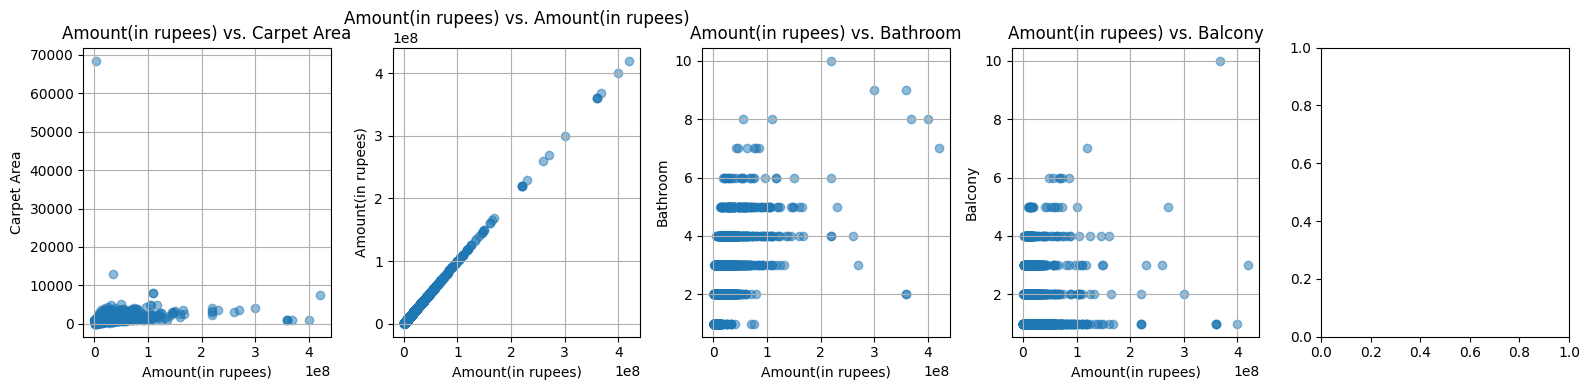

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(16, 4))

col_name = ['Carpet Area', 'Amount(in rupees)', 'Bathroom', 'Balcony']
for i, c in enumerate(col_name):
    axes[i].scatter(out_df['Amount(in rupees)'], out_df[c], alpha=0.5)
    axes[i].set_xlabel('Amount(in rupees)')
    axes[i].set_ylabel(c)
    axes[i].set_title(f'Amount(in rupees) vs. {c}')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# the function to replace outliers with nan
def replace_outliers_with_nan_iqr(out_df, feature, inplace=False):
    desired_feature = out_df[feature]

    Q1, Q3 = desired_feature.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    indices = (desired_feature[(desired_feature > upper_bound) | (desired_feature < lower_bound)]).index
    if not inplace:
        return desired_feature.replace(desired_feature[indices].values, np.nan)
    return desired_feature.replace(desired_feature[indices].values, np.nan, inplace=True)

In [ ]:
features_with_outlier = ['Amount(in rupees)','Carpet Area','Price (in rupees)','Bathroom','Balcony']
features_means = out_df[features_with_outlier].mean()
# iterate through features with outliers
for i in features_with_outlier:
    replace_outliers_with_nan_iqr(out_df, i, inplace=True)

# replace np.nan by the mean values
out_df.fillna(features_means, inplace=True)
out_df.isnull().sum()

Title                0
Description          0
Amount(in rupees)    0
Price (in rupees)    0
location             0
Carpet Area          0
Status               0
Floor                0
Transaction          0
Furnishing           0
facing               0
overlooking          0
Bathroom             0
Balcony              0
Ownership            0
dtype: int64

## **EDA**

In [ ]:
ok_df = out_df.copy()

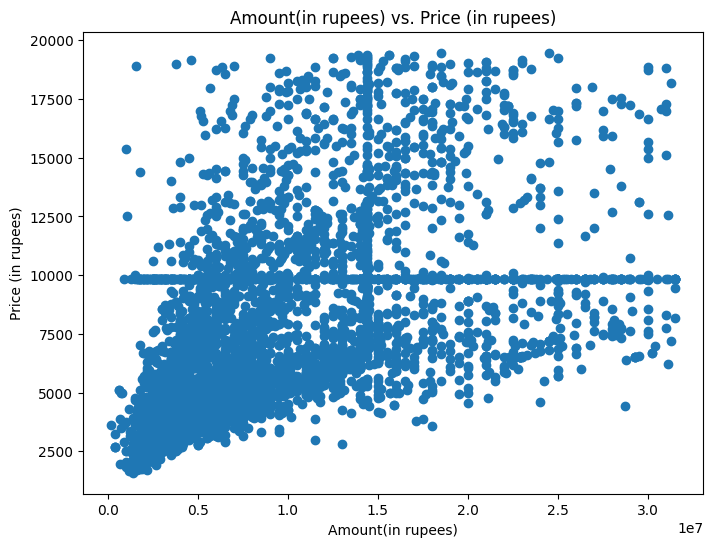

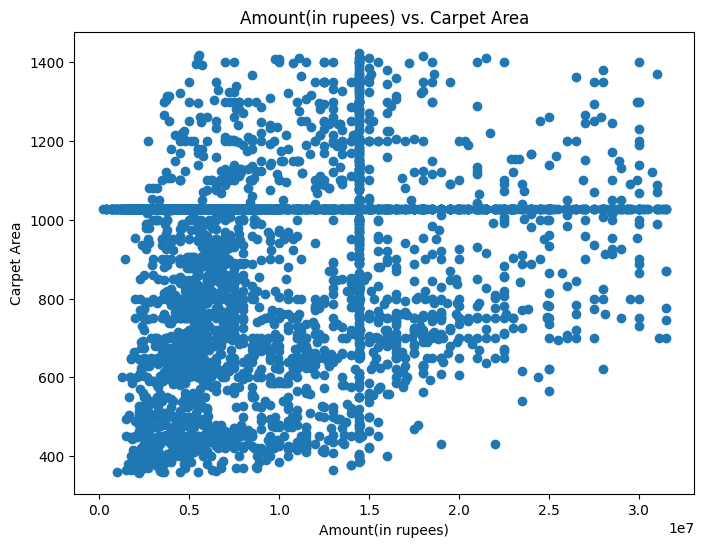

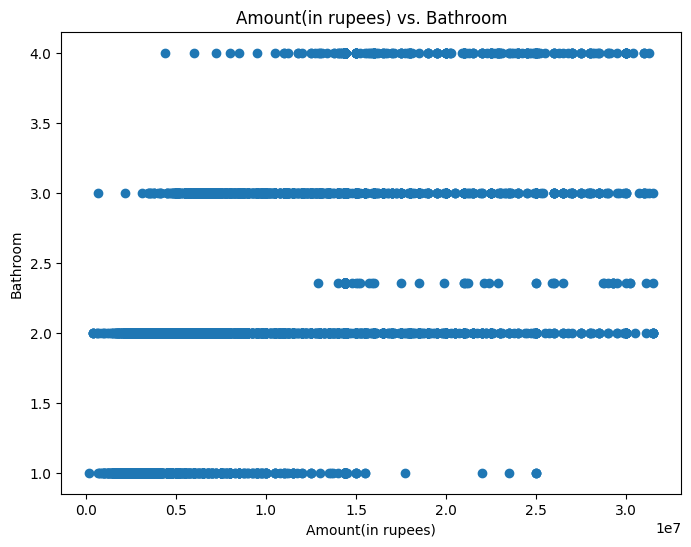

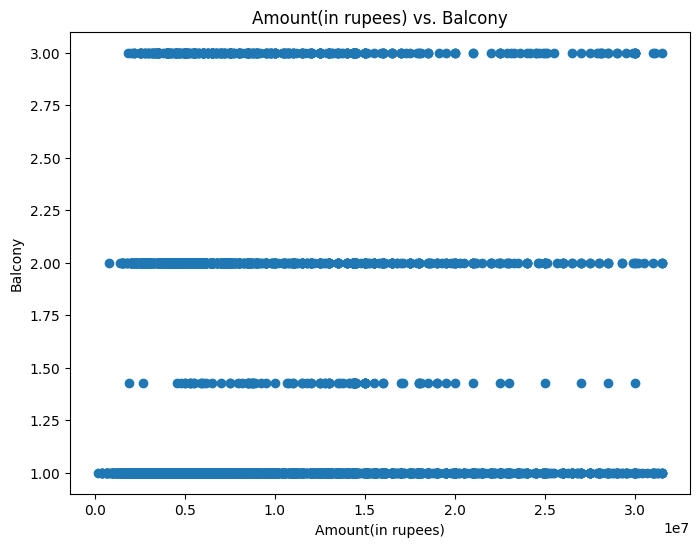

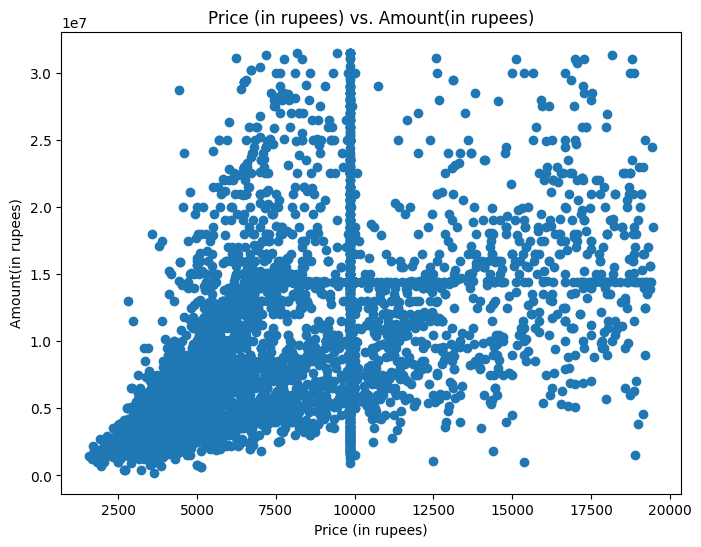

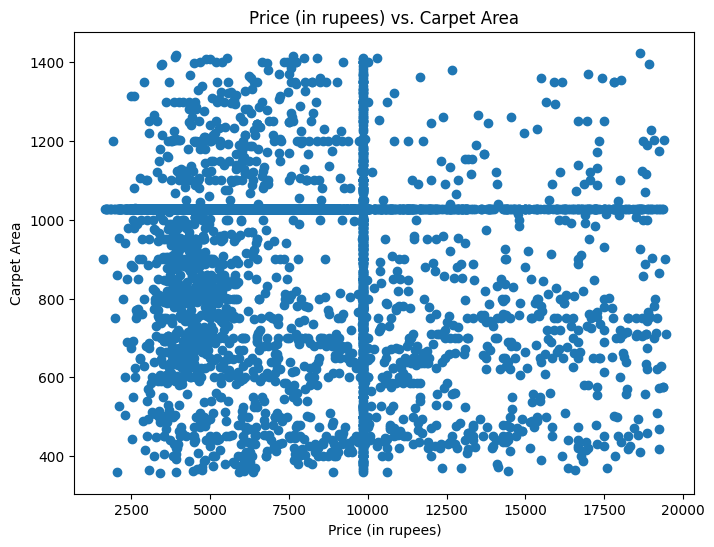

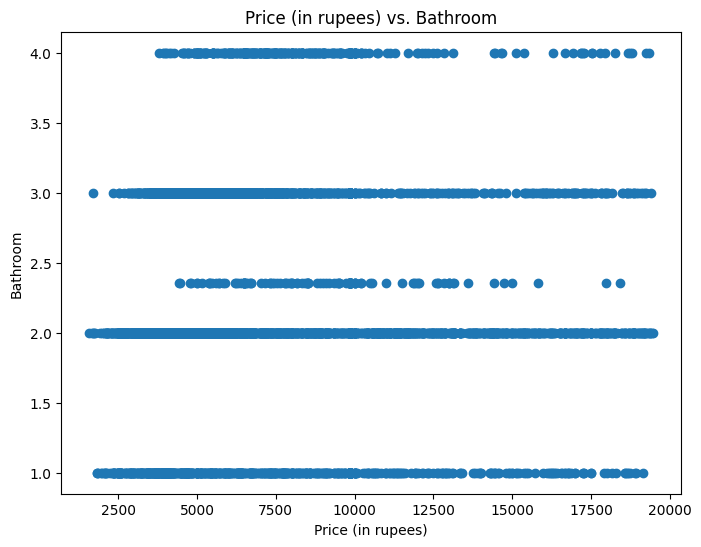

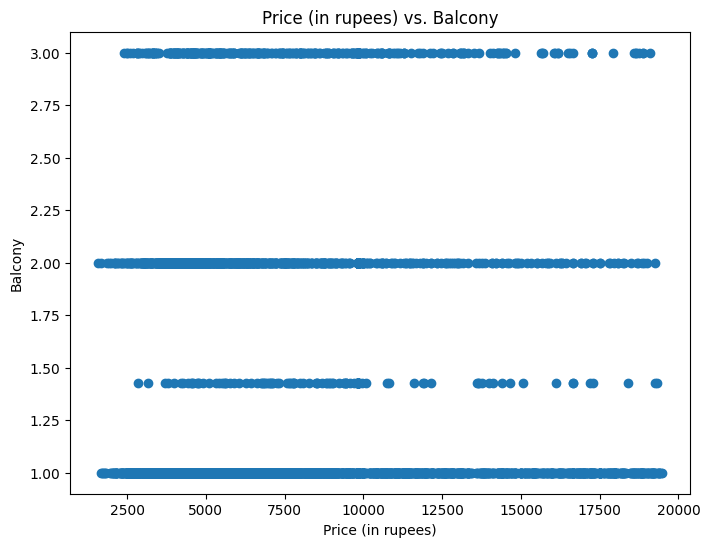

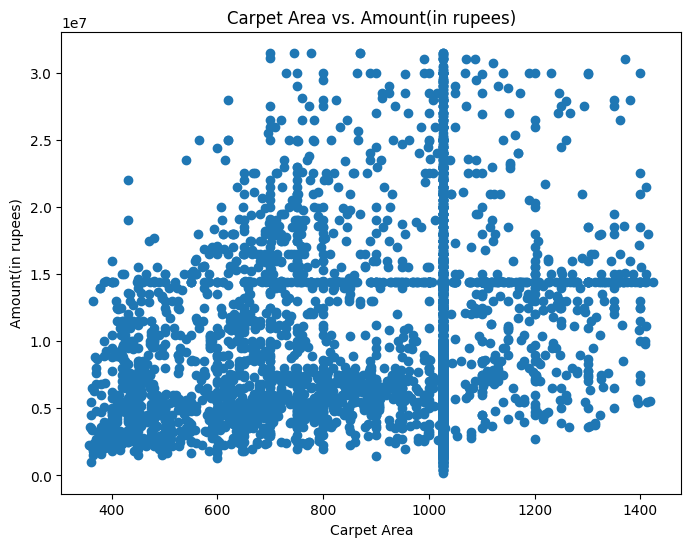

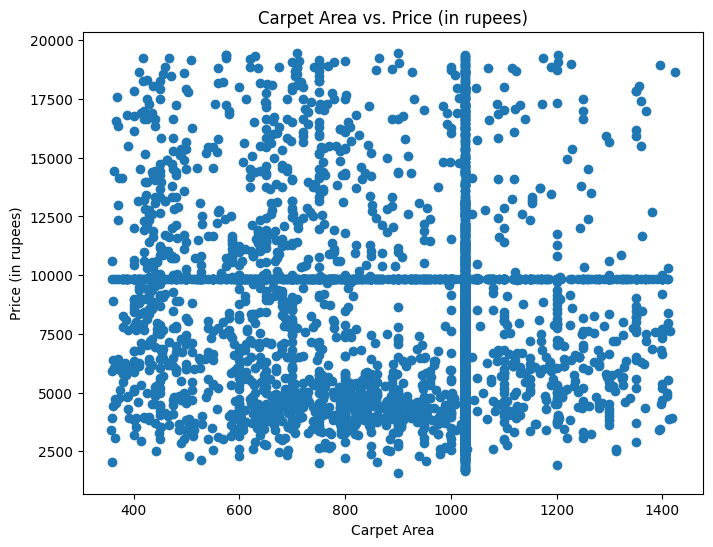

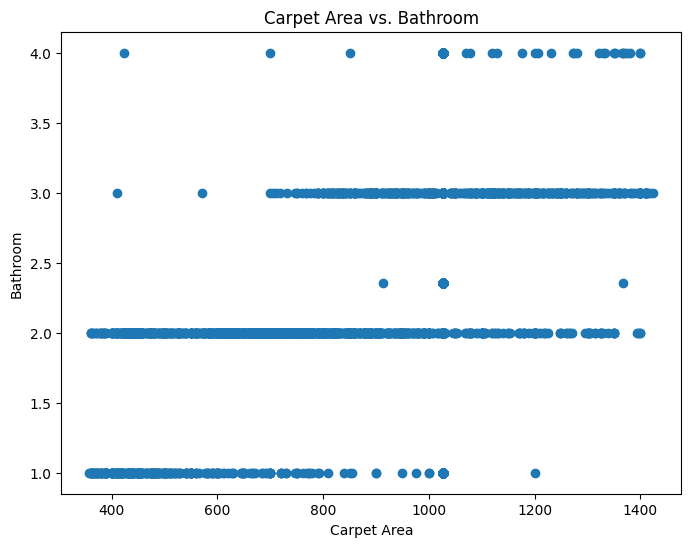

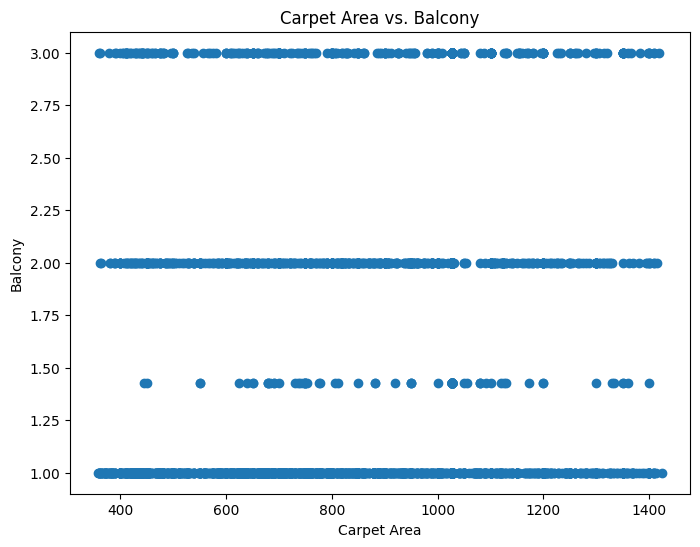

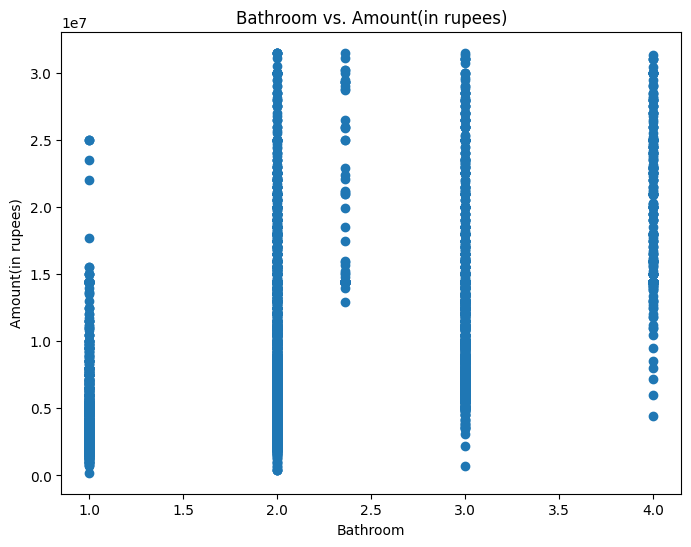

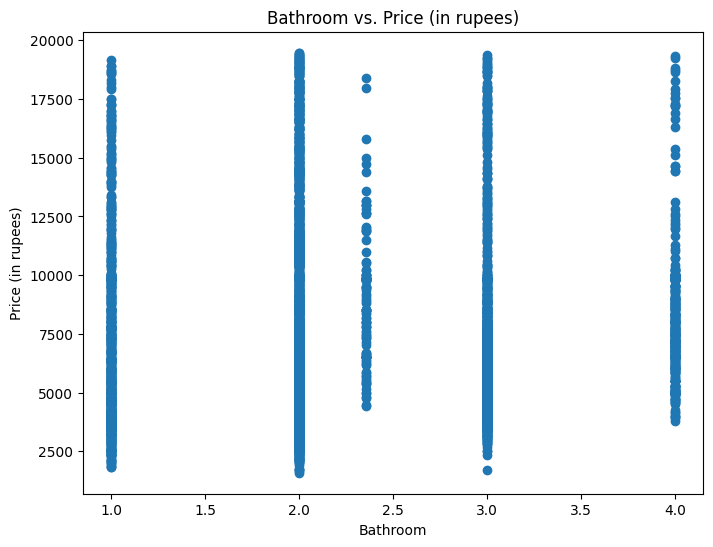

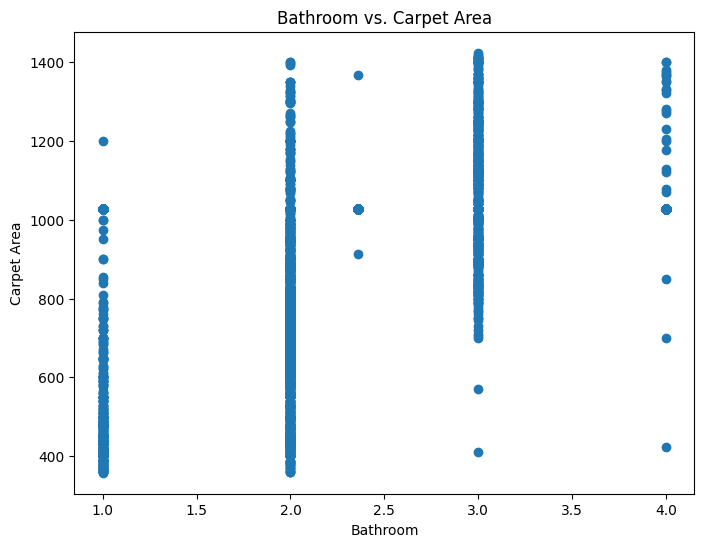

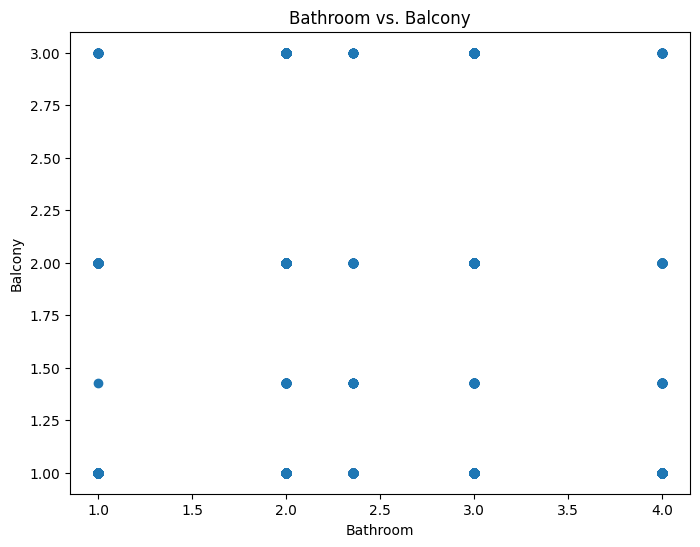

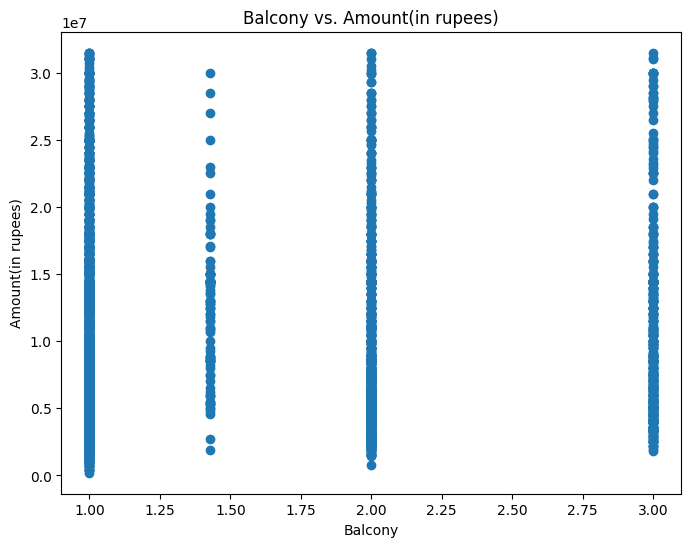

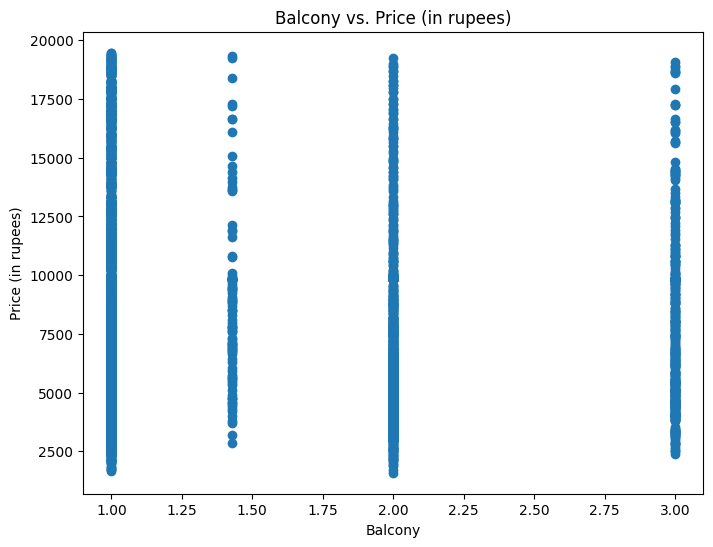

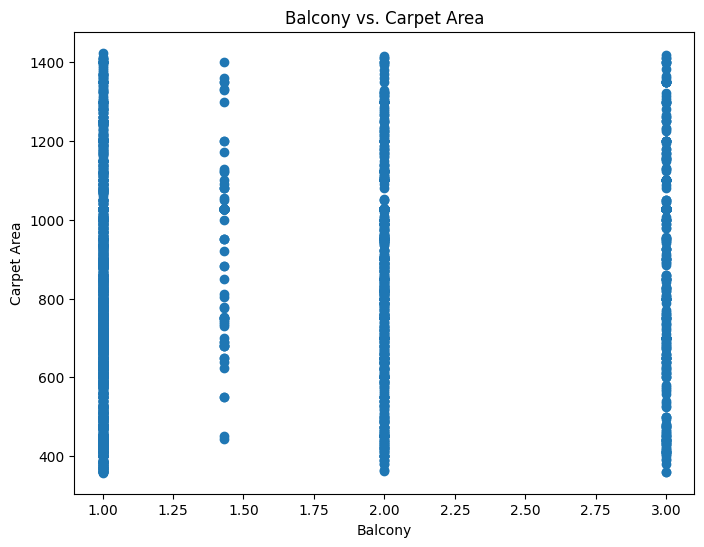

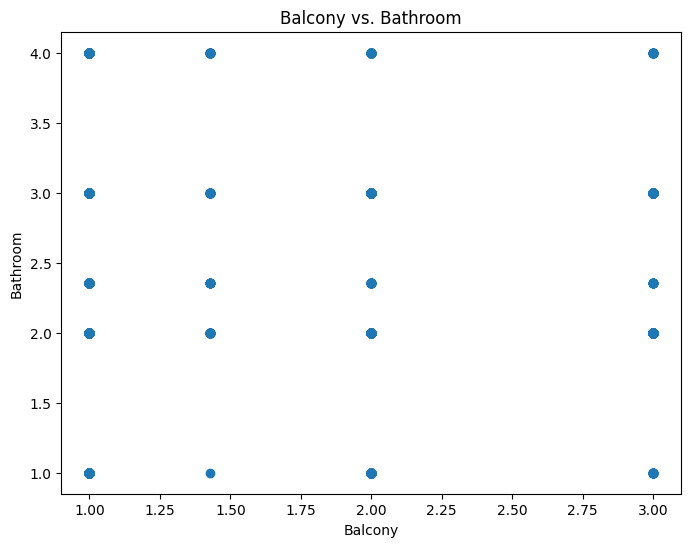

In [ ]:
# Bivariate analysis for numeric vs. numeric variables
numeric_vs_numeric_columns = ['Amount(in rupees)', 'Price (in rupees)', 'Carpet Area', 'Bathroom', 'Balcony']
for column1 in numeric_vs_numeric_columns:
    for column2 in numeric_vs_numeric_columns:
        if column1 != column2:
            plt.figure(figsize=(8, 6))
            plt.scatter(ok_df[column1], ok_df[column2])
            plt.title(f"{column1} vs. {column2}")
            plt.xlabel(column1)
            plt.ylabel(column2)
            plt.show()

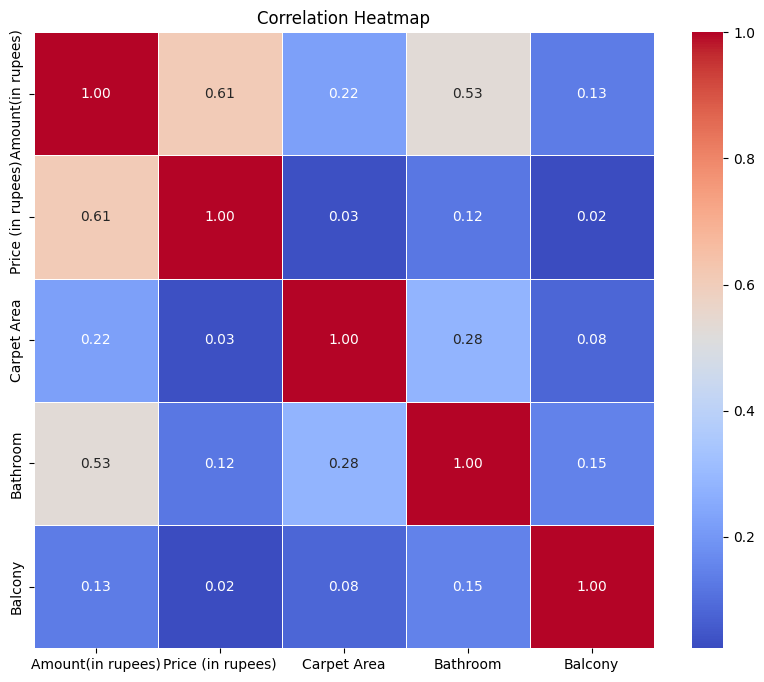

In [ ]:
# correlation Heatmap
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(house_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## **Feature Scaling / Feature Engineering**

In [ ]:
ok_df.drop(columns=['Title','Description','Status'],inplace=True)

In [ ]:
ok_df.head()

,Amount(in rupees),Price (in rupees),location,Carpet Area,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
0,4200000.0,6000.000000,thane,500.0,10 out of 11,Resale,Unfurnished,Unknown,Unknown,1.0,2.0,Unknown
1,9800000.0,13799.000000,thane,473.0,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,2.0,1.0,Freehold
2,14000000.0,17500.000000,thane,779.0,10 out of 29,Resale,Unfurnished,East,Garden/Park,2.0,1.0,Freehold
3,2500000.0,9843.703911,thane,530.0,1 out of 3,Resale,Unfurnished,Unknown,Unknown,1.0,1.0,Unknown
4,16000000.0,18824.000000,thane,635.0,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",2.0,1.0,Co-operative Society


In [ ]:
ok_df.isnull().sum()

Amount(in rupees)    0
Price (in rupees)    0
location             0
Carpet Area          0
Floor                0
Transaction          0
Furnishing           0
facing               0
overlooking          0
Bathroom             0
Balcony              0
Ownership            0
dtype: int64

In [ ]:
len(ok_df['location'].unique())

5

In [ ]:
ok_df['location'] = ok_df['location'].apply(lambda x: x.strip() if isinstance(x, str) else x)
#ok_df['location'] = ok_df['location'].apply(lambda x: x.strip())
location_stats = ok_df['location'].value_counts(ascending=False)
location_stats

ahmedabad      2688
thane           972
mumbai          931
navi-mumbai     359
nagpur          355
Name: location, dtype: int64

## **Encoding Data**

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Function to perform Label Encoding for multiple columns
def label_encode_multiple(ok_df, columns):
    le = LabelEncoder()
    for column in columns:
        ok_df[column] = le.fit_transform(ok_df[column])
    return ok_df

label_encode_columns = ['location','Transaction','Floor', 'Furnishing', 'facing', 'overlooking', 'Ownership']
ok_df = label_encode_multiple(ok_df, label_encode_columns)

## **Standard Scaling**

In [ ]:
final_df = ok_df.copy()

In [ ]:
X = final_df.drop(columns=['Amount(in rupees)'])
y = final_df['Amount(in rupees)']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [ ]:
from sklearn.preprocessing import StandardScaler
#Standardization
standard_scaler = StandardScaler()
df_standardized = standard_scaler.fit_transform(final_df)
final_df = pd.DataFrame(df_standardized, columns=final_df.columns)

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
models = {
    'Support Vector Machine': SVR(C=10, kernel ='linear'),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f'{model_name}:')
    print(f'R-squared: {r2:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print('----------------------------------------')

Support Vector Machine:
R-squared: 0.38
Mean Absolute Error (MAE): 3319473.93
Root Mean Squared Error (RMSE): 5030412.75
----------------------------------------
Random Forest:
R-squared: 0.76
Mean Absolute Error (MAE): 1879341.42
Root Mean Squared Error (RMSE): 3135215.25
----------------------------------------
Gradient Boosting:
R-squared: 0.73
Mean Absolute Error (MAE): 2155964.00
Root Mean Squared Error (RMSE): 3359973.35
----------------------------------------


In [ ]:
# Random Forest has the highest R-squared value and least errors. Thus random forest is THE model for our dataset.

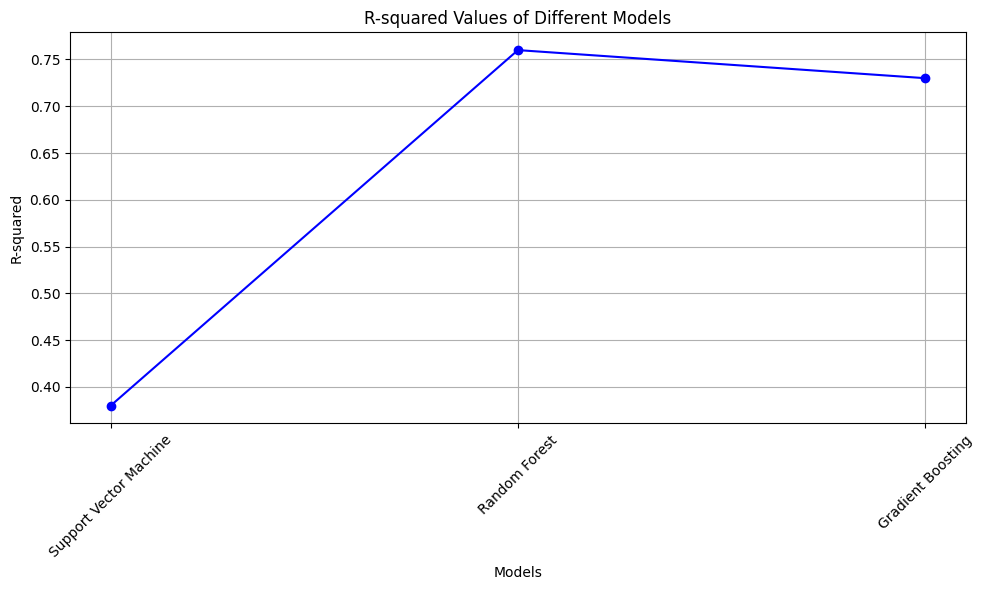

In [ ]:
import matplotlib.pyplot as plt

# Models and their R-squared values
models = ['Support Vector Machine', 'Random Forest', 'Gradient Boosting']
r2_values = [0.38, 0.76, 0.73]

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(models, r2_values, marker='o', color='b', linestyle='-')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('R-squared Values of Different Models')

# Show grid
plt.grid(True)

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


In [ ]:
# Refit the model with best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train_scaled, y_train)

RandomForestRegressor(min_samples_leaf=2, min_samples_split=5, n_estimators=300,
                      random_state=42)

In [ ]:
# Predict on the test set
y_pred = best_rf.predict(X_test_scaled)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'R-squared: {r2:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

R-squared: 0.76
Mean Squared Error (MSE): 9492384216077.39
Root Mean Squared Error (RMSE): 3080971.31


In [ ]:
def predict_price(model, input_data):
    # Encode the columns that were label encoded
    le = LabelEncoder()
    for column in label_encode_columns:
        input_data[column] = le.fit_transform(input_data[column])

    # Make the prediction
    estimated_price = model.predict(input_data)[0]
    return estimated_price

In [ ]:
input_data = pd.DataFrame({
    'Price (in rupees)': [6000],
    'location': ['thane'],
    'Carpet Area': [1283.153494],
    'Floor': ['10 out of 11'],
    'Transaction': ['Resale'],
    'Furnishing': ['Unfurnished'],
    'facing': ['Unknown'],
    'overlooking': ['Unknown'],
    'Bathroom': [1.0],
    'Balcony': [2.0],
    'Ownership': ['Unknown']
})

estimated_price = predict_price(best_rf, input_data)
print(f"Estimated Amount: {estimated_price}")

Estimated Amount: 18859295.50198008


## **Exporting Modules**

In [ ]:
import pickle
with open('house_price_model.pickle','wb') as f:
   pickle.dump(final_model,f)

In [ ]:
import joblib
# Save the model
joblib.dump(model, 'house_price_model.joblib')

['house_price_model.joblib']

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [ ]:
locations = {
    'locations' : df['location'].unique().tolist()
}
with open("locations.json","w") as f:
  f.write(json.dumps(locations))